In [1]:
import sklearn

In [2]:
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
ground_truth_path = r"D:/deepfakes/data/test/labels.csv"

In [6]:
results = r"D:/deepfakes/inference/scores.csv"

In [7]:
target_names = ["REAL", "FAKE"]

In [8]:
results = pd.read_csv(results)

In [9]:
results

,filename,label
0,4000.mp4,0.990000
1,4001.mp4,0.949572
2,4002.mp4,0.985998
3,4003.mp4,0.188101
4,4004.mp4,0.044082
...,...,...
3967,7995.mp4,0.168463
3968,7996.mp4,0.392554
3969,7997.mp4,0.046404
3970,7998.mp4,0.450972


## Prepare Data for evaluation

In [13]:
ground_truth = pd.read_csv(ground_truth_path)

In [55]:
ground_truth

,filename,label
0,4000.mp4,1
1,4001.mp4,1
2,4002.mp4,1
3,4003.mp4,0
4,4004.mp4,0
...,...,...
3995,7995.mp4,0
3996,7996.mp4,0
3997,7997.mp4,0
3998,7998.mp4,1


In [26]:
truth_labels = ground_truth["label"].values

In [27]:
len(truth_labels)

4000

In [28]:
predicted_labels = results["label"].values

In [29]:
len(predicted_labels)

4000

# Loss

In [30]:
from sklearn.metrics import log_loss

In [31]:
loss = log_loss(truth_labels, predicted_labels)

In [32]:
loss

0.5294406869625556

## Plotting

In [43]:
cm = confusion_matrix(truth_labels, predicted_labels)

In [44]:
cm

array([[1893,  107],
       [ 788, 1212]], dtype=int64)

In [45]:
import matplotlib.pyplot as plt

<AxesSubplot:>

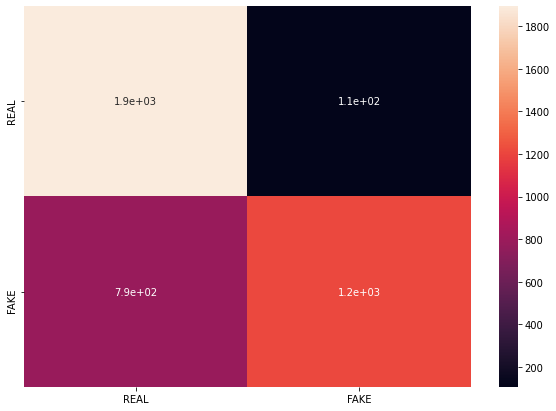

In [46]:
df_cm = pd.DataFrame(cm, index = target_names,
                  columns = target_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [48]:
print("Classification report for deepfake classifier:\n%s\n"
      % (classification_report(truth_labels, predicted_labels, target_names=target_names)))

Classification report for deepfake classifier:
              precision    recall  f1-score   support

        REAL       0.71      0.95      0.81      2000
        FAKE       0.92      0.61      0.73      2000

    accuracy                           0.78      4000
   macro avg       0.81      0.78      0.77      4000
weighted avg       0.81      0.78      0.77      4000


